# **Análisis exploratorio y estadística**

# AE11 - CAPSTONE - Reconstrucción análisis 538 - Fandango

## <font color='blue'>**Contexto**</font>

__[FiveThirtyEight](https://fivethirtyeight.com/)__, a veces representado como __538__, es un sitio web estadounidense que se centra en el análisis de encuestas de opinión, la política, la economía y los blogs deportivos.

En octubre de 2015, publico un análisis que tituló "Be Suspicious Of Online Movie Ratings, Especially Fandango’s" (Sospeche de las clasificaciones de películas en línea, especialmente de Fandango), en el cual analizaba y cuestionaba el hecho que __la misma empresa__ (Fandango) tenía un __conflicto de interés__ al __publicar las calificaciones__ de las películas y __vender entradas__ al mismo tiempo.

## <font color='blue'>**Preguntas de investigación**</font>
1. ¿Tienen Fandango alguna predisposición a calificar las películas por encima de lo que deberían calificar?
2. ¿Hay evidencias de conflicto de interés en un sitio web que nos entrega las calificaciones de las películas y que, además, nos vende entradas?


## <font color='blue'>**Misión**</font>
Su objetivo es completar las actividades a continuación basándose en el artículo __538__ mencionado, y ver si llega a una conclusión similar. Utilice los conocimientos adquiridos (`Pandas`, `Numpy`,`Malplotlib`, visualización y estadísticas) para determinar si las calificaciones de Fandango en 2015 tenían un sesgo hacia calificar mejor las películas para vender más boletos.



## <font color='blue'>__Ejercicios__</font>

### <font color='green'>**Actividad 1**</font>
### Investigación de los antecedentes y los datos


1. Lea el artículo: [Sospeche de las calificaciones de películas en línea, especialmente las de Fandango](http://fivethirtyeight.com/features/fandango-movies-ratings/)
2. Lea los datasets del estudio. Hay dos archivos csv, uno con las calificaciones de Fandango (`fandango_scrape.csv`), y el otro con datos agregados para clasificaciones de películas de otros sitios, como Metacritic, IMDB y Rotten Tomatoes (`all_sites_scores.csv`). Los datos de Fandango se extrajeron el 24 de agosto de 2015, y contienen al menos 3 valoraciones de usuarios por película.
3. Explore las características de ambos datasets.

__Descripción de all_sites_scores.csv__

Columna | Contenido
--- | -----------
FILM | La película analizada
RottenTomatoes | Rotten Tomatoes Tomatometer valoración para la película
RottenTomatoes_User | Rotten Tomatoes valoración de usuario para la película
Metacritic | Metacritic valoración para la película
Metacritic_User | Metacritic valoración de usuario para la película
IMDB | IMDb valoración de usuario para la película
Metacritic_user_vote_count | Número de votos de usuario que tuvo la película en Metacritic
IMDB_user_vote_count | Número de votos de usuario que tuvo la película en IMDb


__Descripción de fandango_scrape.csv__

Contiene todas las películas analizadas por el sitio __538__.

Columna | Contenido
--- | ---------
FILM | La película analizada
STARS | Valoración en estrellas presentada en Fandango.com
RATING |El valor de calificación de Fandango para la película, extraído del HTML de cada página. Esta es la puntuación media real que obtuvo la película.
VOTES | Cantidad de personas que habían revisado la película en el momento en que la sacamos.

In [ ]:
# Tu código aquí ...
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.float_format = '{:,.4f}'.format

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Leemos los archivos
fandango = pd.read_csv("/content/drive/MyDrive/Diplomado Data Science UDD/Modulo 3/data/fandango_scrape.csv")
all_sites = pd.read_csv("/content/drive/MyDrive/Diplomado Data Science UDD/Modulo 3/data/all_sites_scores.csv")

In [ ]:
# Explore las características de ambos datasets.

fandango.head()

,FILM,STARS,RATING,VOTES
0,Fifty Shades of Grey (2015),4.0000,3.9000,34846
1,Jurassic World (2015),4.5000,4.5000,34390
2,American Sniper (2015),5.0000,4.8000,34085
3,Furious 7 (2015),5.0000,4.8000,33538
4,Inside Out (2015),4.5000,4.5000,15749


In [ ]:
fandango.describe()

,STARS,RATING,VOTES
count,504.0000,504.0000,504.0000
mean,3.5585,3.3758,"1,147.8631"
std,1.5631,1.4912,"3,830.5831"
min,0.0000,0.0000,0.0000
25%,3.5000,3.1000,3.0000
50%,4.0000,3.8000,18.5000
75%,4.5000,4.3000,189.7500
max,5.0000,5.0000,"34,846.0000"


In [ ]:
fandango.shape

(504, 4)

In [ ]:
fandango.isna().sum()

FILM      0
STARS     0
RATING    0
VOTES     0
dtype: int64

In [ ]:
all_sites.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
0,Avengers: Age of Ultron (2015),74,86,66,7.1000,7.8000,1330,271107
1,Cinderella (2015),85,80,67,7.5000,7.1000,249,65709
2,Ant-Man (2015),80,90,64,8.1000,7.8000,627,103660
3,Do You Believe? (2015),18,84,22,4.7000,5.4000,31,3136
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4000,5.1000,88,19560


In [ ]:
all_sites.describe()

,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
count,146.0000,146.0000,146.0000,146.0000,146.0000,146.0000,146.0000
mean,60.8493,63.8767,58.8082,6.5192,6.7370,185.7055,"42,846.2055"
std,30.1688,20.0244,19.5174,1.5107,0.9587,316.6065,"67,406.5092"
min,5.0000,20.0000,13.0000,2.4000,4.0000,4.0000,243.0000
25%,31.2500,50.0000,43.5000,5.7000,6.3000,33.2500,"5,627.0000"
50%,63.5000,66.5000,59.0000,6.8500,6.9000,72.5000,"19,103.0000"
75%,89.0000,81.0000,75.0000,7.5000,7.4000,168.5000,"45,185.7500"
max,100.0000,94.0000,94.0000,9.6000,8.6000,"2,375.0000","334,164.0000"


In [ ]:
all_sites.shape

(146, 8)

In [ ]:
all_sites.isna().sum()

FILM                          0
RottenTomatoes                0
RottenTomatoes_User           0
Metacritic                    0
Metacritic_User               0
IMDB                          0
Metacritic_user_vote_count    0
IMDB_user_vote_count          0
dtype: int64

<font color='green'>Fin actividad 1</font>

### <font color='green'>**Actividad 2**</font>

### Explorando las valoraciones mostradas en Fandango frente a las puntuaciones reales de los usuarios

Exploremos las calificaciones de Fandango para ver si nuestro análisis está de acuerdo con la conclusión del artículo.

1. Explore la relación entre la popularidad de una película y su calificación. Cree un diagrama de dispersión que muestre la relación entre la calificación y los votos.
2. Calcule la correlación entre las distintas variables y visualícelas.
3. Calcule cuántas películas hay en Fandango por año y visualice.
4. Cuáles son las 10 películas con más votaciones?
5. Cuántas películas tienen cero votos?
6. Cree un nuevo DataFrame con las películas que tienen al menos un voto



In [ ]:
# Tu código aquí ...
# 1. Relación entre la popularidad de una película y su calificación
fandango.head()

,FILM,STARS,RATING,VOTES
0,Fifty Shades of Grey (2015),4.0000,3.9000,34846
1,Jurassic World (2015),4.5000,4.5000,34390
2,American Sniper (2015),5.0000,4.8000,34085
3,Furious 7 (2015),5.0000,4.8000,33538
4,Inside Out (2015),4.5000,4.5000,15749


<Axes: xlabel='RATING', ylabel='STARS'>

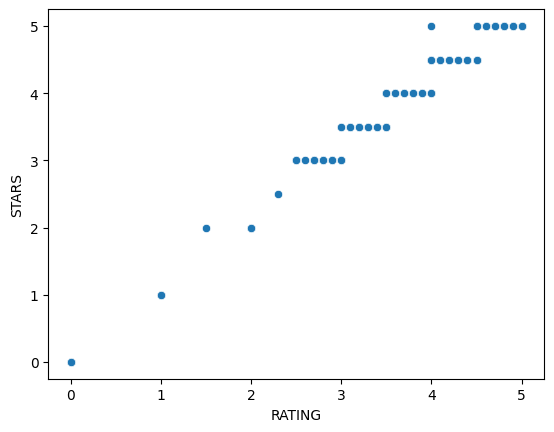

In [ ]:
sns.scatterplot(data = fandango, x = 'RATING', y = 'STARS')

<Axes: xlabel='VOTES', ylabel='STARS'>

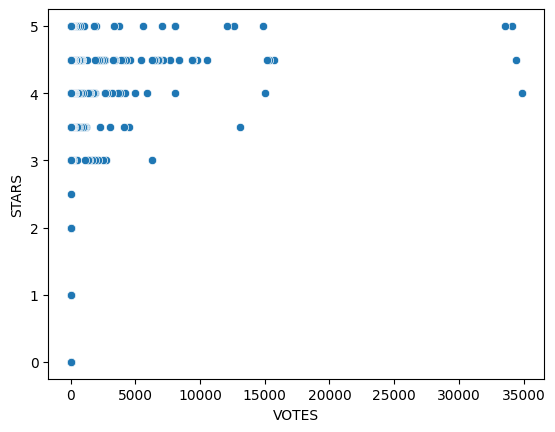

In [ ]:
sns.scatterplot(data = fandango, x = 'VOTES', y = 'STARS')

In [ ]:
# 2. Correlación entre las distintas variables
fandango.corr(numeric_only = True)

,STARS,RATING,VOTES
STARS,1.0000,0.9947,0.1642
RATING,0.9947,1.0000,0.1638
VOTES,0.1642,0.1638,1.0000


In [ ]:
# 3. Calcule cuántas películas hay en Fandango por año y visualice.
fandango['Year'] = fandango['FILM'].str.extract(r'(\(\d{4}\)$)')

In [ ]:
fandango['Year'] = fandango['Year'].str.strip('()')

<Axes: xlabel='Year', ylabel='count'>

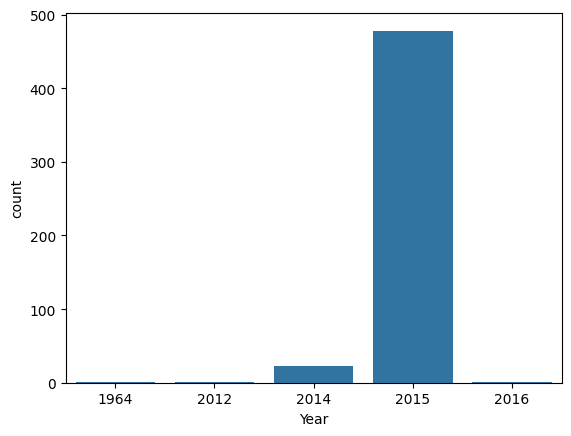

In [ ]:
Orden = fandango['Year'].sort_values()
sns.countplot(fandango, x = 'Year', order = Orden)

In [ ]:
fandango.groupby('Year')['FILM'].count()

Year
1964      1
2012      1
2014     23
2015    478
2016      1
Name: FILM, dtype: int64

In [ ]:
# 4. Las 10 películas con más votos
fandango.nlargest(10, columns = 'VOTES', keep = 'all')

,FILM,STARS,RATING,VOTES,Year
0,Fifty Shades of Grey (2015),4.0000,3.9000,34846,2015
1,Jurassic World (2015),4.5000,4.5000,34390,2015
2,American Sniper (2015),5.0000,4.8000,34085,2015
3,Furious 7 (2015),5.0000,4.8000,33538,2015
4,Inside Out (2015),4.5000,4.5000,15749,2015
5,The Hobbit: The Battle of the Five Armies (2014),4.5000,4.3000,15337,2014
6,Kingsman: The Secret Service (2015),4.5000,4.2000,15205,2015
7,Minions (2015),4.0000,4.0000,14998,2015
8,Avengers: Age of Ultron (2015),5.0000,4.5000,14846,2015
9,Into the Woods (2014),3.5000,3.4000,13055,2014


In [ ]:
# 5. Cuántas películas tienen cero votos

fandango[fandango['VOTES'] == 0].count()

FILM      69
STARS     69
RATING    69
VOTES     69
Year      69
dtype: int64

In [ ]:
# 6. Creamos una nuevo DataFrame con las películas con al menos una valoración
fandango = fandango[fandango['VOTES'] >= 1]

In [ ]:
fandango.describe()

,STARS,RATING,VOTES
count,435.0000,435.0000,435.0000
mean,4.1230,3.9113,"1,329.9379"
std,0.7066,0.6914,"4,094.3282"
min,1.0000,1.0000,1.0000
25%,3.5000,3.5000,6.0000
50%,4.0000,4.0000,28.0000
75%,4.5000,4.4000,404.5000
max,5.0000,5.0000,"34,846.0000"


<font color='green'>Fin actividad 2</font>

### <font color='green'>**Actividad 3**</font>

En un sistema de redondeo normal, un sitio redondearía a la media estrella de valoración más cercana, hacia arriba o hacia abajo. Como se indica en el artículo, el sistema de redondeo de Fandango, y a modo de ejemplo, en el caso de "Ted 2", esperaríamos que la calificación se redondeara a 4 estrellas (dado que la valoración es de usuarios es 4.1). Sin embargo, Fandango redondeó el "ratingValue" hacia arriba, hasta un 4.5. Esto nos demuestra que la calificación real del usuario puede ser ligeramente diferente a la calificación que se le muestra a un usuario en el sitio web.
Visualice esta diferencia en distribuciones.

1. Verifique con gráficos KDE rellenos si las distribuciones de las calificaciones que se muestran (STARS) son distintas a la calificación real de los votos (RATING). Tip: recorte los KDE a 0-5 con
`clip=[0,5]`

2. Si es que en el punto anterior hay una diferencia, cuantifíquela y añádala en una nueva columna del DataFrame. Esta nueva columna debe quedar expresada con un decimal.

3. Grafique la cantidad de veces que cada diferencia (0.1, 0.2, 0.3, etc.) se produce.

4. ¿Qué película(s) tiene(n) un diferencial de más de media estrella?

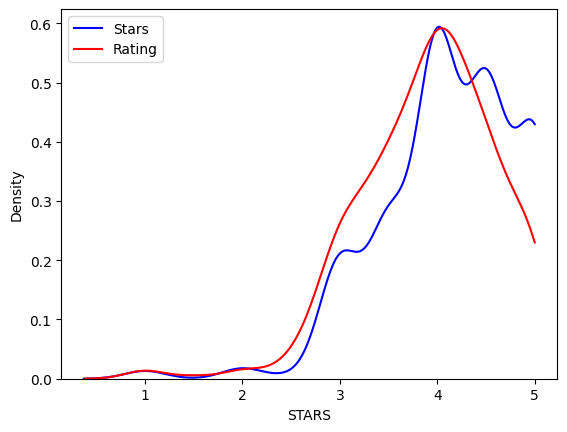

In [ ]:
# Tu código aquí ...
# 1. Comparamos los KDEs


sns.kdeplot(fandango, x = 'STARS', color = 'b', clip = [0,5], label = 'Stars')
sns.kdeplot(fandango, x = 'RATING', color = 'r', clip = [0,5], label = 'Rating')
plt.legend()


In [ ]:
# 2. Cuantifiquemos ahora realmente esta discrepancia.

fandango['Diferencia'] = (fandango['STARS'] - fandango['RATING']).round(1)

In [ ]:
fandango.groupby('Diferencia')['FILM'].count()

Diferencia
0.0000    107
0.1000     66
0.2000     82
0.3000     72
0.4000     70
0.5000     37
1.0000      1
Name: FILM, dtype: int64

[Text(0, 0, '107'),
 Text(0, 0, '66'),
 Text(0, 0, '82'),
 Text(0, 0, '72'),
 Text(0, 0, '70'),
 Text(0, 0, '37'),
 Text(0, 0, '1')]

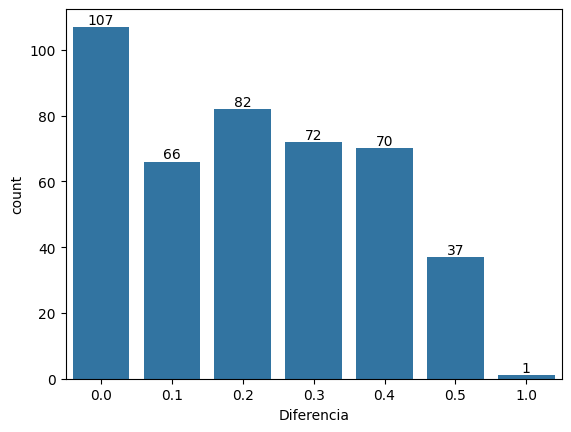

In [ ]:
# 3. Cantidad de veces que las diferencias se producen.
ax = sns.countplot(fandango, x = 'Diferencia')
ax.bar_label(ax.containers[0])

In [ ]:
# 4. Buscamos la pelicula con una diferencia de más de media estrella
fandango[fandango['Diferencia'] > 0.5]

,FILM,STARS,RATING,VOTES,Year,Diferencia
381,Turbo Kid (2015),5.0000,4.0000,2,2015,1.0000


<font color='green'>Fin actividad 3</font>

### <font color='green'>**Actividad 4**</font>
## Comparación de las valoraciones de Fandango con Rotten Tomatoes

Compare las valoraciones de Fandango con la de __Rotten Tomatoes__. Analice y comente las diferencias.

1. Analice __Rotten Tomatoes__ (__RT__). Observe cómo el sitio tiene dos valoraciones; una de críticos especializados y otra de usuarios. Realice una visualización de dispersión de ambas variables.

2. Determine la diferencia comparando las calificaciones de los críticos y las calificaciones de los usuarios de __RT__. Cree una nueva columna basada en la diferencia entre las calificaciones de los críticos y las calificaciones de los usuarios para Rotten Tomatoes. Calcule esto con `RottenTomatoes - RottenTomatoes_User`

3. Calcule la diferencia media absoluta obtenida en el punto 2. Atención con los valores negativos.

4. Visualice con 2 subplots horizontales:
  * La distribución de las diferencias entre `RT Critics Score` y `RT User Score`. Debe haber valores negativos en esta gráfica de distribución. Utilice KDE e histogramas para mostrar esta distribución.
  * La distribución que muestre la diferencia en valor absoluto.
  * Incluya un título a cada subplot y un título general a nivel del lienzo (figure).

5. ¿Cuáles son las 10 películas más valoradas por los usuarios en promedio que los críticos? Y ¿Cuáles son las 10 películas con mejores valoraciones de críticos de películas que de usuarios?

<Axes: xlabel='RottenTomatoes', ylabel='RottenTomatoes_User'>

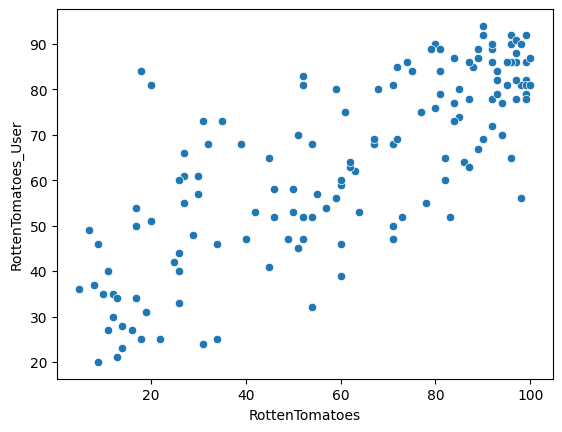

In [ ]:
sns.scatterplot(data = all_sites, x = 'RottenTomatoes', y = 'RottenTomatoes_User')

In [ ]:
# 2. Rotten_Diff =  Critics - User Score.

all_sites['Diferencia_RT'] = all_sites['RottenTomatoes'] - all_sites['RottenTomatoes_User']

In [ ]:
# 3. Diferencia media absoluta
print(f'La diferencia media es de {all_sites["Diferencia_RT"].mean():.2f}')
print()
print(f'La diferencia media absoluta es de {all_sites["Diferencia_RT"].abs().mean():.2f}')



La diferencia media es de -3.03

La diferencia media absoluta es de 15.10


Text(0.5, 1.0, 'Diferencia Absoluta')

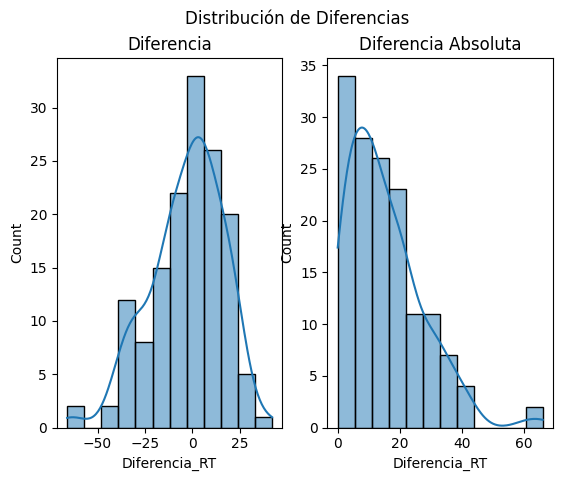

In [ ]:
# 4. Visualización de la distribución de las diferencias y del valor absoluto de las diferencias
#Visualice con 2 subplots horizontales:

fig, ax = plt.subplots(1,2)

fig.suptitle('Distribución de Diferencias')

sns.histplot(all_sites['Diferencia_RT'], ax = ax[0], kde = True)
ax[0].set_title('Diferencia')

sns.histplot(all_sites['Diferencia_RT'].abs(), ax = ax[1], kde = True)
ax[1].set_title('Diferencia Absoluta')


In [ ]:
# 5. Las 10 películas más valoradas por los usuarios en promedio que los críticos
all_sites.nsmallest(10, 'Diferencia_RT')

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Diferencia_RT
3,Do You Believe? (2015),18,84,22,4.7000,5.4000,31,3136,-66
85,Little Boy (2015),20,81,30,5.9000,7.4000,38,5927,-61
105,Hitman: Agent 47 (2015),7,49,28,3.3000,5.9000,67,4260,-42
134,The Longest Ride (2015),31,73,33,4.8000,7.2000,49,25214,-42
125,The Wedding Ringer (2015),27,66,35,3.3000,6.7000,126,37292,-39
132,Max (2015),35,73,47,5.9000,7.0000,15,5444,-38
15,Taken 3 (2015),9,46,26,4.6000,6.1000,240,104235,-37
19,Pixels (2015),17,54,27,5.3000,5.6000,246,19521,-37
51,Entourage (2015),32,68,38,5.2000,7.1000,96,21914,-36
47,Annie (2014),27,61,33,4.8000,5.2000,108,19222,-34


In [ ]:
# Las 10 películas con mejores valoraciones de críticos de películas que de usuarios
all_sites.nlargest(10, 'Diferencia_RT')

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Diferencia_RT
69,Mr. Turner (2014),98,56,94,6.6000,6.9000,98,13296,42
112,It Follows (2015),96,65,83,7.5000,6.9000,551,64656,31
115,While We're Young (2015),83,52,76,6.7000,6.4000,65,17647,31
37,Welcome to Me (2015),71,47,67,6.9000,5.9000,33,8301,24
40,I'll See You In My Dreams (2015),94,70,75,6.9000,6.9000,14,1151,24
145,"Kumiko, The Treasure Hunter (2015)",87,63,68,6.4000,6.7000,19,5289,24
90,The SpongeBob Movie: Sponge Out of Water (2015),78,55,62,6.5000,6.1000,196,26046,23
7,Top Five (2014),86,64,81,6.8000,6.5000,124,16876,22
11,Black Sea (2015),82,60,62,6.6000,6.4000,37,16547,22
87,Maggie (2015),54,32,52,6.5000,5.6000,90,18986,22


<font color='green'>Fin actividad 4</font>

### <font color='green'>**Actividad 5**</font>
## Comparación de las valoraciones de Fandango con MetaCritic

Ahora echemos un vistazo a las calificaciones de __MetaCritic__. Metacritic también muestra una calificación de usuario promedio en comparación con su calificación oficial mostrada.

1. Realice una visualización de dispersión de ambas variables.

2. Determine la diferencia comparando las calificaciones de los críticos y las calificaciones de los usuarios de __RT__. De forma similar a la __Actividad 4__ cree una nueva columna basada en la diferencia entre las calificaciones de los críticos y las calificaciones de los usuarios para MetaCritic. Calcule esto con `Metacritic - Metacritic_User`

3. Visualice las comparación de diferencias de __RT__ con las de __MetaCritic__.

<Axes: xlabel='Metacritic', ylabel='Metacritic_User'>

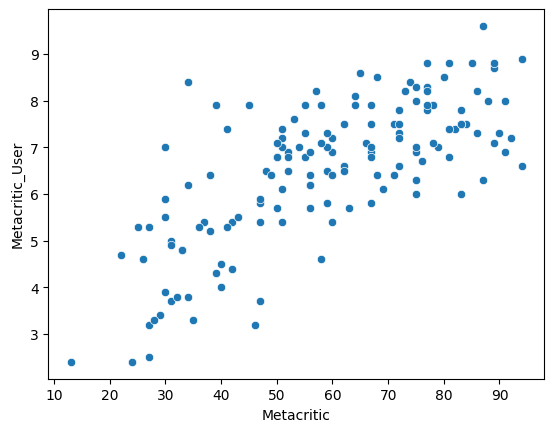

In [ ]:
# Tu código aquí ...
# 1. Visualización de dispersión de crítica oficial versus de usuarios
sns.scatterplot(data = all_sites, x = 'Metacritic', y = 'Metacritic_User')

In [ ]:
# 2. Metacritic_Diff =  Criticos - Usuarios

all_sites['Diferencia_MC'] = all_sites['Metacritic'] - all_sites['Metacritic_User']

<Axes: xlabel='Diferencia_RT', ylabel='Diferencia_MC'>

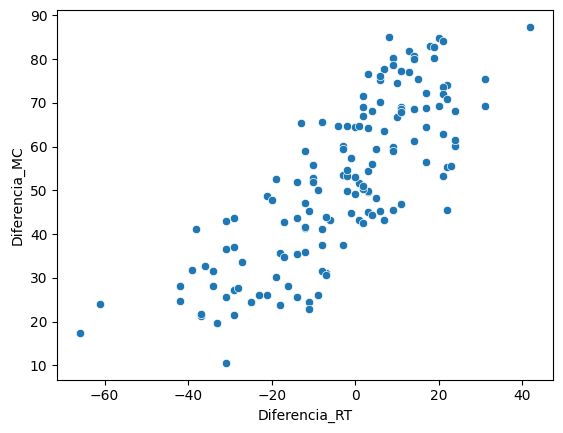

In [ ]:
# 3. Dispersión de diferencias

sns.scatterplot(data = all_sites, x = 'Diferencia_RT', y = 'Diferencia_MC')

<font color='green'>Fin actividad 5</font>

### <font color='green'>**Actividad 6**</font>
## Comparación de valoraciones de Fandago vs. All Sites

Explore si Fandango muestra artificialmente calificaciones más altas que las justificadas para impulsar la venta de boletos.

1. Combine ambos datasets (`Fandango` con `All_Sites`). ¿Cuántos registros se pierden en la fusión?
2. Normalice las columnas para que sus escalas sean comparables. Fandango utiliza una escala de $0-5$ para `STARS` y `RATINGS`.
3. Simplifique el DataFrame. Genere una copia con las valoraciones normalizadas. Incluya `STARS`y `RATING` desde Fandango.
4. Compare de la distribución de puntuaciones entre sitios. ¿Fandango muestra calificaciones anormalmente altas? Ya sabemos que su `RATING` mostrado es más alto que las valoraciones de usuarios (`STARS`), pero ¿son las calificaciones en sí mismas más altas que el promedio? Analice y comente.
5. Cree una gráfica `hisplot` comparando todas las puntuaciones normalizadas.
6. ¿Cómo se califican las peores películas en todos los sitios? Cree una visualización del tipo `clustermap` de todas las puntuaciones normalizadas. Investigue acerca de esta gráfica avanzada de `Seaborn`.
7. Según las calificaciones de los críticos de __RT__, ¿cuáles son las 10 películas con las calificaciones más bajas? ¿Cuáles son las puntuaciones normalizadas en los otros sitios para estas películas?

In [ ]:
# Tu código aquí ...
# 1. Merge de ambos datasets
# No todas las películas de la tabla Fandango están en la tabla All_Sites
# algunas películas de Fandango tienen muy pocas críticas o ninguna.
# Solo queremos comparar películas que están en ambos DataFrames,
Union = fandango.merge(all_sites, how = 'inner', on = 'FILM')

In [ ]:
Union.count()

FILM                          145
STARS                         145
RATING                        145
VOTES                         145
Year                          145
Diferencia                    145
RottenTomatoes                145
RottenTomatoes_User           145
Metacritic                    145
Metacritic_User               145
IMDB                          145
Metacritic_user_vote_count    145
IMDB_user_vote_count          145
Diferencia_RT                 145
Diferencia_MC                 145
dtype: int64

In [ ]:
all_sites.count()

FILM                          146
RottenTomatoes                146
RottenTomatoes_User           146
Metacritic                    146
Metacritic_User               146
IMDB                          146
Metacritic_user_vote_count    146
IMDB_user_vote_count          146
Diferencia_RT                 146
Diferencia_MC                 146
dtype: int64

In [ ]:
fandango.count()

FILM          435
STARS         435
RATING        435
VOTES         435
Year          435
Diferencia    435
dtype: int64

De esta forma comprobamos que solo se pierde 1 registro de Fandango al realizar el merge.

In [ ]:
Union.head()

,FILM,STARS,RATING,VOTES,Year,Diferencia,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Diferencia_RT,Diferencia_MC
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,0.1,25,42,46,3.2,4.2,778,179506,-17,42.8
1,Jurassic World (2015),4.5,4.5,34390,2015,0.0,71,81,59,7.0,7.3,1281,241807,-10,52.0
2,American Sniper (2015),5.0,4.8,34085,2015,0.2,72,85,72,6.6,7.4,850,251856,-13,65.4
3,Furious 7 (2015),5.0,4.8,33538,2015,0.2,81,84,67,6.8,7.4,764,207211,-3,60.2
4,Inside Out (2015),4.5,4.5,15749,2015,0.0,98,90,94,8.9,8.6,807,96252,8,85.1


Tenga en cuenta que RT, Metacritic e IMDB no usan una puntuación entre 0-5 estrellas como lo hace Fandango. Para hacer una comparación justa, necesitamos * normalizar * estos valores para que todos caigan entre 0 y 5 estrellas y la relación entre las reseñas se mantenga igual.


Tips:
1. https://stackoverflow.com/questions/26414913/normalize-columns-of-pandas-data-frame

2. Otra forma simple de normalizar es dividiendo las escalas para asemejarlas a la de Fandango.
  * 100/20 = 5
  * 10/2 = 5

In [ ]:
# 2. Normalización de las valoraciones
Union = Union[['FILM','STARS', 'RATING', 'RottenTomatoes', 'RottenTomatoes_User', 'Metacritic', 'Metacritic_User', 'IMDB']]

In [ ]:
Union

,FILM,STARS,RATING,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB
0,Fifty Shades of Grey (2015),4.0,3.9,25,42,46,3.2,4.2
1,Jurassic World (2015),4.5,4.5,71,81,59,7.0,7.3
2,American Sniper (2015),5.0,4.8,72,85,72,6.6,7.4
3,Furious 7 (2015),5.0,4.8,81,84,67,6.8,7.4
4,Inside Out (2015),4.5,4.5,98,90,94,8.9,8.6
...,...,...,...,...,...,...,...,...
140,"Kumiko, The Treasure Hunter (2015)",3.5,3.5,87,63,68,6.4,6.7
141,The Diary of a Teenage Girl (2015),4.0,3.6,95,81,87,6.3,7.0
142,The Wrecking Crew (2015),4.5,4.2,93,84,67,7.0,7.8
143,Tangerine (2015),4.0,3.9,95,86,86,7.3,7.4


In [ ]:
Union_Num = Union.select_dtypes(include='number')

In [ ]:
Normalized_Union = (Union_Num - Union_Num.mean()) / Union_Num.std()

In [ ]:
Normalized_Union

,STARS,RATING,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB
0,-0.159298,0.116673,-1.181472,-1.086199,-0.649833,-2.190088,-2.640714
1,0.764628,1.310853,0.343672,0.866266,0.015531,0.324998,0.595384
2,1.688554,1.907944,0.376827,1.066519,0.680895,0.060253,0.699775
3,1.688554,1.907944,0.675225,1.016456,0.424986,0.192625,0.699775
4,0.764628,1.310853,1.238865,1.316835,1.806895,1.582542,1.952458
...,...,...,...,...,...,...,...
140,-1.083223,-0.679448,0.874156,-0.034872,0.476168,-0.072120,-0.030957
141,-0.159298,-0.480417,1.139399,0.866266,1.448622,-0.138307,0.282214
142,0.764628,0.713763,1.073088,1.016456,0.424986,0.324998,1.117336
143,-0.159298,0.116673,1.139399,1.116582,1.397440,0.523558,0.699775


In [ ]:
# 3. Simplificación del DataFrame
Union[Normalized_Union.columns] = Normalized_Union

In [ ]:
Union

,FILM,STARS,RATING,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB
0,Fifty Shades of Grey (2015),-0.159298,0.116673,-1.181472,-1.086199,-0.649833,-2.190088,-2.640714
1,Jurassic World (2015),0.764628,1.310853,0.343672,0.866266,0.015531,0.324998,0.595384
2,American Sniper (2015),1.688554,1.907944,0.376827,1.066519,0.680895,0.060253,0.699775
3,Furious 7 (2015),1.688554,1.907944,0.675225,1.016456,0.424986,0.192625,0.699775
4,Inside Out (2015),0.764628,1.310853,1.238865,1.316835,1.806895,1.582542,1.952458
...,...,...,...,...,...,...,...,...
140,"Kumiko, The Treasure Hunter (2015)",-1.083223,-0.679448,0.874156,-0.034872,0.476168,-0.072120,-0.030957
141,The Diary of a Teenage Girl (2015),-0.159298,-0.480417,1.139399,0.866266,1.448622,-0.138307,0.282214
142,The Wrecking Crew (2015),0.764628,0.713763,1.073088,1.016456,0.424986,0.324998,1.117336
143,Tangerine (2015),-0.159298,0.116673,1.139399,1.116582,1.397440,0.523558,0.699775


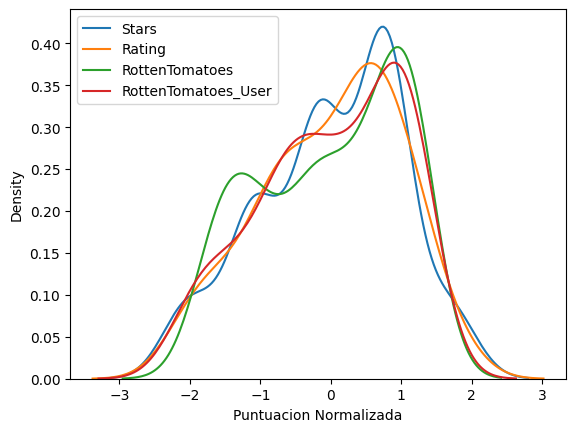

In [ ]:
# 4. Comparando distribuciones de valoraciones
sns.kdeplot(Union, x = 'STARS', label = 'Stars')
sns.kdeplot(Union, x = 'RATING', label = 'Rating')
sns.kdeplot(Union, x = 'RottenTomatoes', label = 'RottenTomatoes')
sns.kdeplot(Union, x = 'RottenTomatoes_User', label = 'RottenTomatoes_User')
plt.xlabel('Puntuacion Normalizada')
plt.legend()

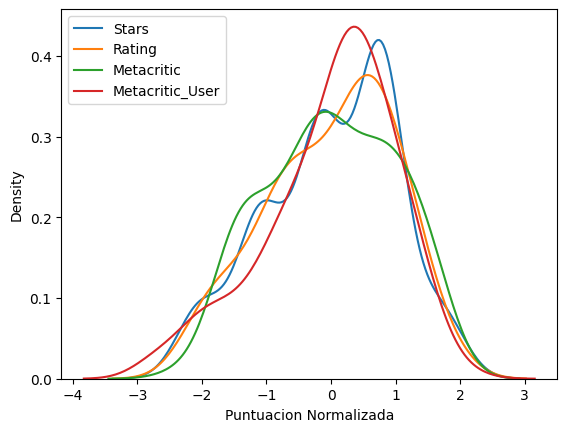

In [ ]:
sns.kdeplot(Union, x = 'STARS', label = 'Stars')
sns.kdeplot(Union, x = 'RATING', label = 'Rating')
sns.kdeplot(Union, x = 'Metacritic', label = 'Metacritic')
sns.kdeplot(Union, x = 'Metacritic_User', label = 'Metacritic_User')
plt.xlabel('Puntuacion Normalizada')
plt.legend()

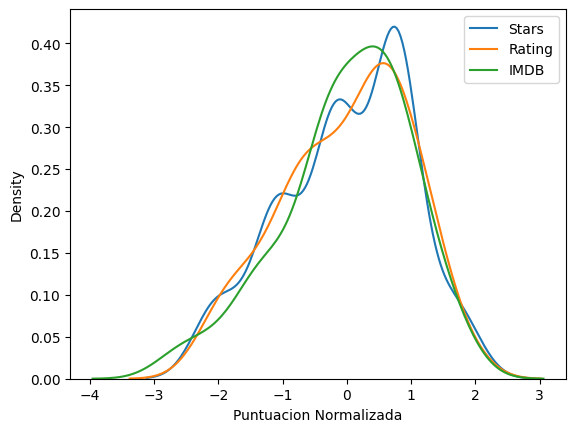

In [ ]:
sns.kdeplot(Union, x = 'STARS', label = 'Stars')
sns.kdeplot(Union, x = 'RATING', label = 'Rating')
sns.kdeplot(Union, x = 'IMDB', label = 'IMDB')
plt.xlabel('Puntuacion Normalizada')
plt.legend()

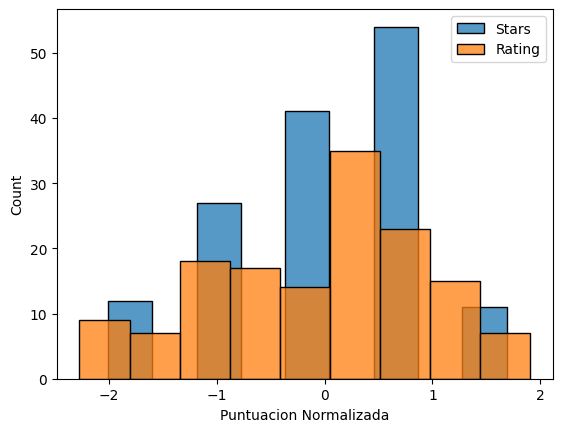

In [ ]:
# 5. Hisplot comparando todas las puntuaciones normalizadas.

sns.histplot(Union, x = 'STARS', label = 'Stars')
sns.histplot(Union, x = 'RATING', label = 'Rating')
plt.xlabel('Puntuacion Normalizada')
plt.legend()

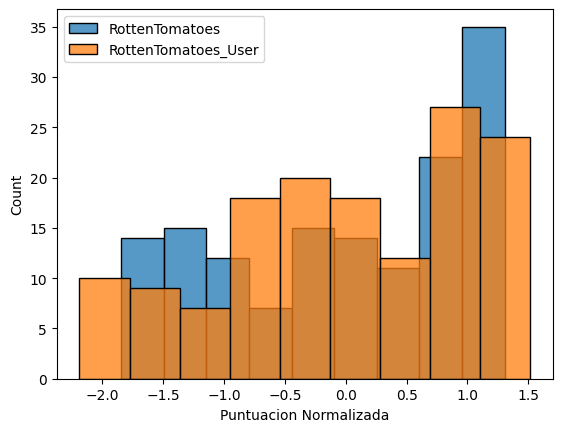

In [ ]:
sns.histplot(Union, x = 'RottenTomatoes', label = 'RottenTomatoes')
sns.histplot(Union, x = 'RottenTomatoes_User', label = 'RottenTomatoes_User')
plt.xlabel('Puntuacion Normalizada')
plt.legend()

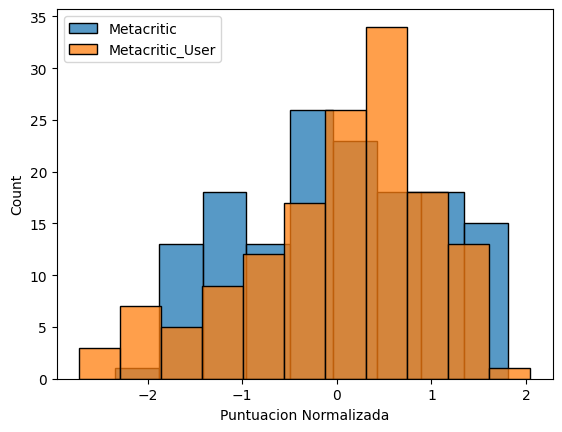

In [ ]:
sns.histplot(Union, x = 'Metacritic', label = 'Metacritic')
sns.histplot(Union, x = 'Metacritic_User', label = 'Metacritic_User')
plt.xlabel('Puntuacion Normalizada')
plt.legend()

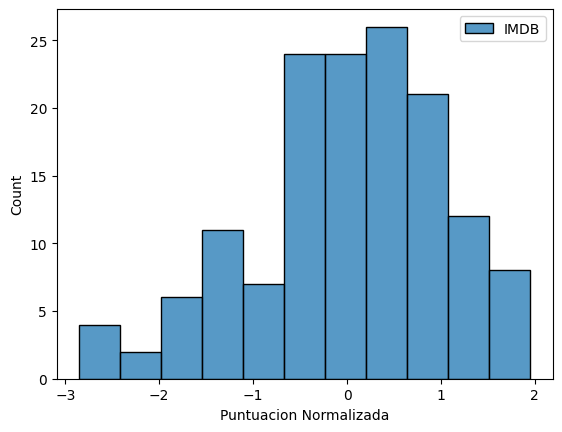

In [ ]:
sns.histplot(Union, x = 'IMDB', label = 'IMDB')
plt.xlabel('Puntuacion Normalizada')
plt.legend()

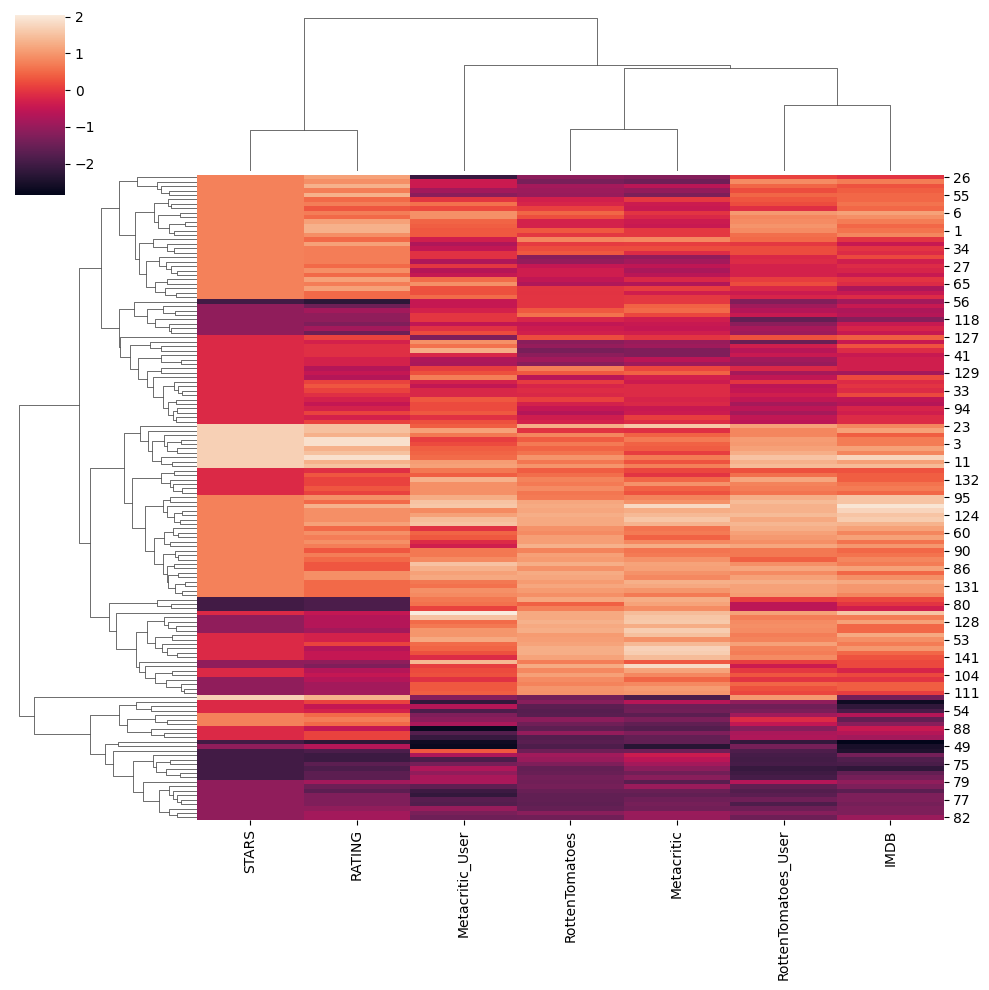

In [ ]:
# 6. clustermap
# Las películas de alta calificación
# deben agruparse en comparación con las películas de baja calificación.
sns.clustermap(Union.select_dtypes('number'))

In [ ]:
Union.select_dtypes('number')

,STARS,RATING,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB
0,-0.159298,0.116673,-1.181472,-1.086199,-0.649833,-2.190088,-2.640714
1,0.764628,1.310853,0.343672,0.866266,0.015531,0.324998,0.595384
2,1.688554,1.907944,0.376827,1.066519,0.680895,0.060253,0.699775
3,1.688554,1.907944,0.675225,1.016456,0.424986,0.192625,0.699775
4,0.764628,1.310853,1.238865,1.316835,1.806895,1.582542,1.952458
...,...,...,...,...,...,...,...
140,-1.083223,-0.679448,0.874156,-0.034872,0.476168,-0.072120,-0.030957
141,-0.159298,-0.480417,1.139399,0.866266,1.448622,-0.138307,0.282214
142,0.764628,0.713763,1.073088,1.016456,0.424986,0.324998,1.117336
143,-0.159298,0.116673,1.139399,1.116582,1.397440,0.523558,0.699775


In [ ]:
Union.describe()

,STARS,RATING,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB
count,145.0000,145.0000,145.0000,145.0000,145.0000,145.0000,145.0000
mean,-0.0000,0.0000,-0.0000,-0.0000,-0.0000,-0.0000,0.0000
std,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
min,-2.0071,-2.2717,-1.8446,-2.1876,-2.3388,-2.7196,-2.8495
25%,-1.0832,-0.6794,-0.9825,-0.6857,-0.8034,-0.5354,-0.4485
50%,-0.1593,0.1167,0.0784,0.1153,0.0155,0.1926,0.1778
75%,0.7646,0.7138,0.9405,0.8663,0.8344,0.6559,0.6998
max,1.6886,1.9079,1.3052,1.5171,1.8069,2.0458,1.9525


In [ ]:
# 7. Examinemos las 10 peores películas.
Union.nsmallest(10, 'RottenTomatoes')

,FILM,STARS,RATING,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB
49,Paul Blart: Mall Cop 2 (2015),-1.0832,-0.6794,-1.8446,-1.3866,-2.3388,-2.7196,-2.5363
84,Hitman: Agent 47 (2015),-0.1593,0.1167,-1.7783,-0.7358,-1.5711,-2.1239,-0.8661
54,Hot Pursuit (2015),-0.1593,-0.2814,-1.7451,-1.3365,-1.4176,-1.8592,-1.9100
25,Taken 3 (2015),0.7646,0.5147,-1.7120,-0.8859,-1.6735,-1.2635,-0.6573
28,Fantastic Four (2015),-2.0071,-2.2717,-1.7120,-2.1876,-1.6223,-2.6534,-2.8495
50,The Boy Next Door (2015),-0.1593,-0.4804,-1.6788,-1.4366,-1.4687,-0.6678,-2.2232
87,Unfinished Business (2015),-1.0832,-1.2765,-1.6456,-1.8371,-1.3664,-1.7930,-1.3880
88,The Loft (2015),-0.1593,-0.4804,-1.6456,-1.1863,-1.7758,-2.7196,-0.4485
77,Seventh Son (2015),-1.0832,-1.2765,-1.6125,-1.4366,-1.4687,-1.7268,-1.2836
78,Mortdecai (2015),-1.0832,-1.2765,-1.6125,-1.6870,-1.6223,-2.1901,-1.2836


<font color='green'>Fin actividad 6</font>